<a href="https://colab.research.google.com/github/yokesh412/house-price-predictions/blob/main/house_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/house price/train.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

DATA CLEANING

In [ ]:
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]

In [ ]:
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


Alley,poolQC,Fence,Miscfeature contains huge null values.so ,drop that column.

In [ ]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
train[['LotFrontage','MasVnrArea','GarageYrBlt','GarageFinish']] =train[['LotFrontage','MasVnrArea','GarageYrBlt','GarageFinish']].fillna(0)

In [ ]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

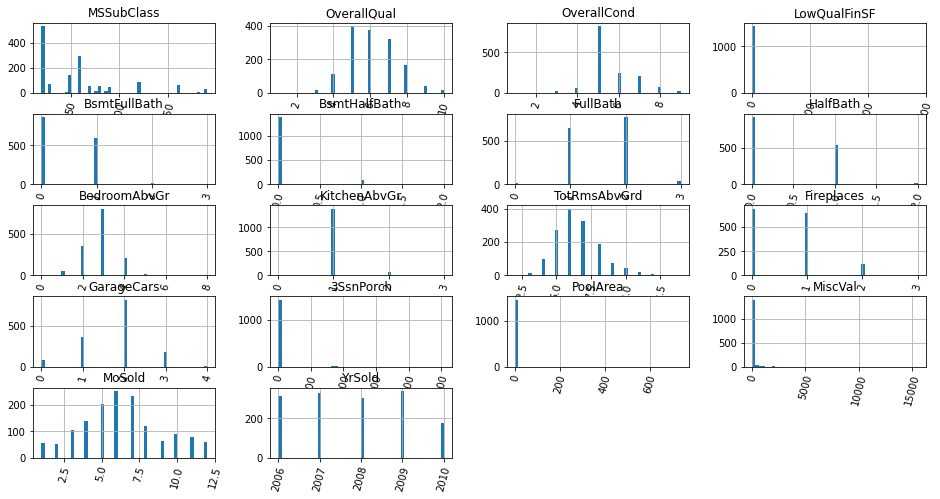

In [ ]:
train.hist(discrete_feature, bins = 50,figsize=(16,8),xrot=75)
plt.show()

In [ ]:
#Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 20


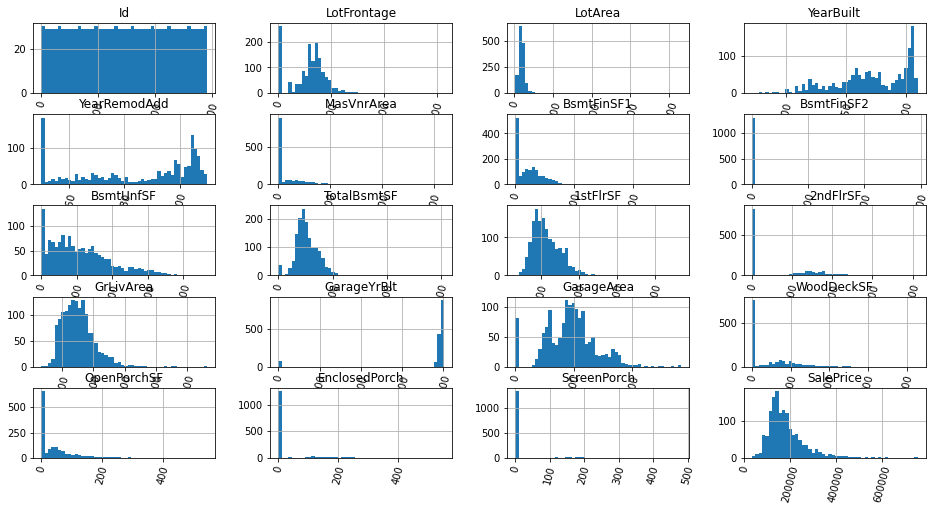

In [ ]:
train.hist(continuous_feature, bins = 50,figsize=(16,8),xrot=75)
plt.show()

In [ ]:
#visualising categorical features
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 5
The feature is ExterQual and number of 

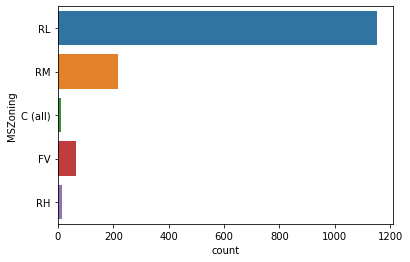

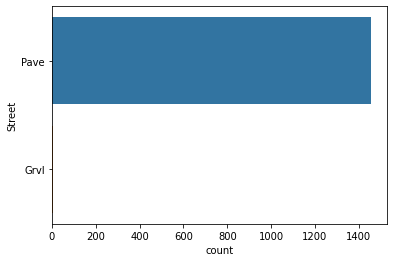

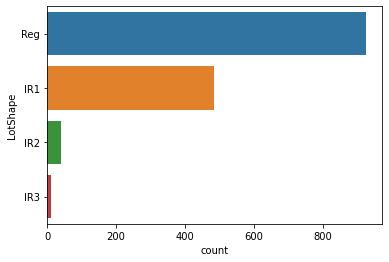

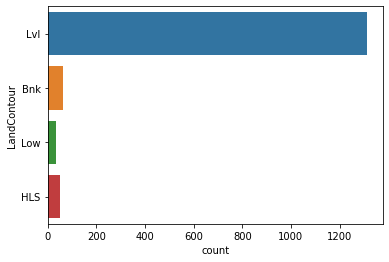

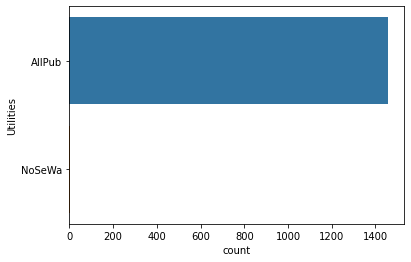

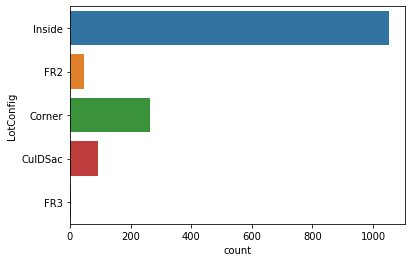

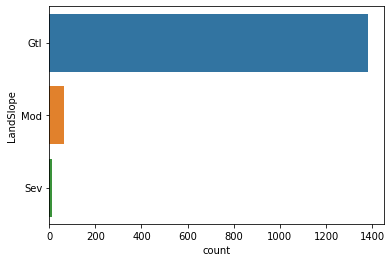

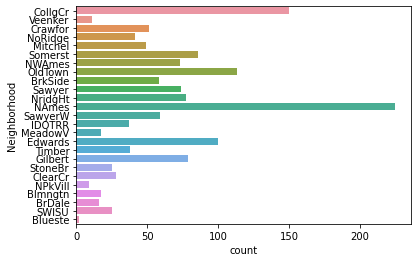

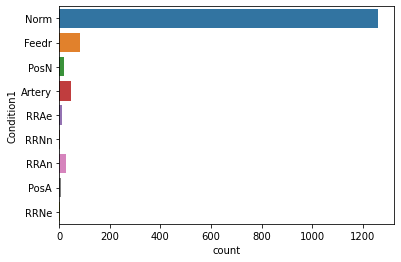

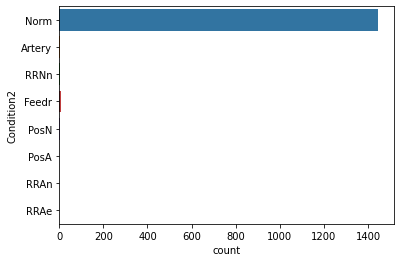

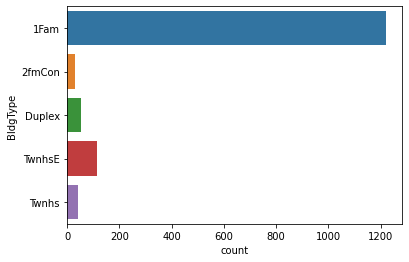

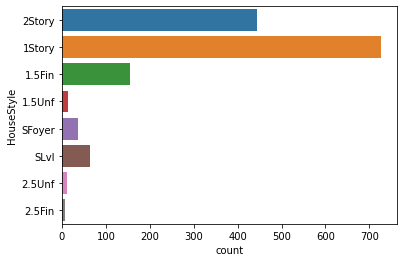

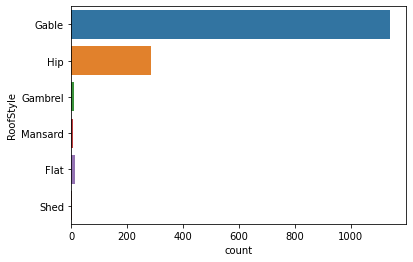

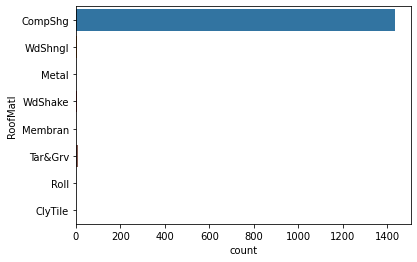

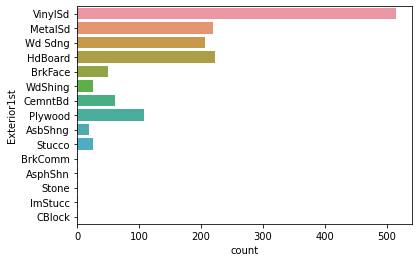

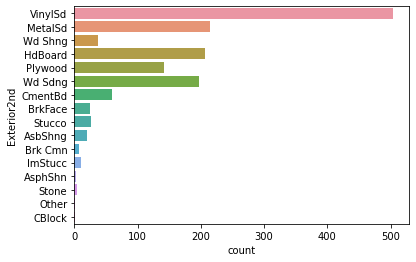

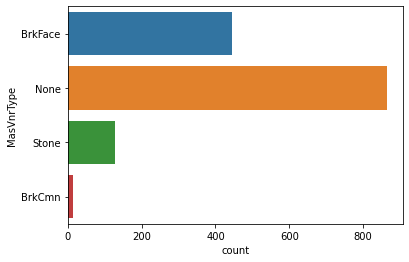

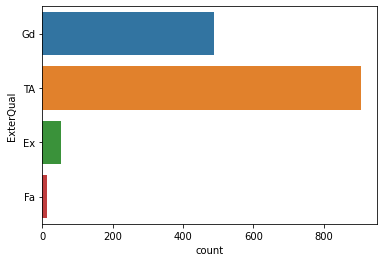

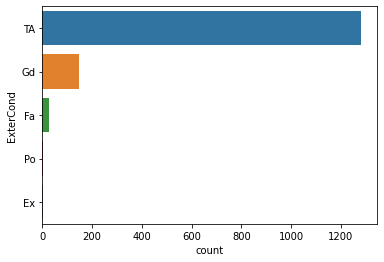

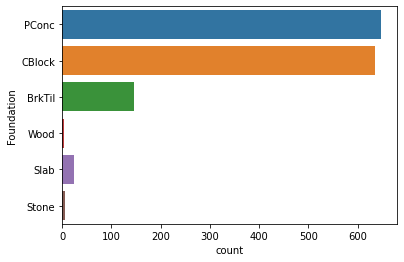

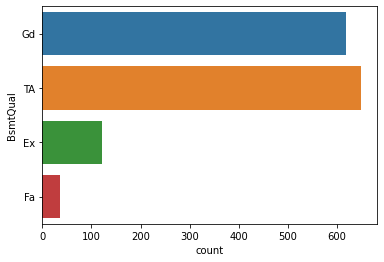

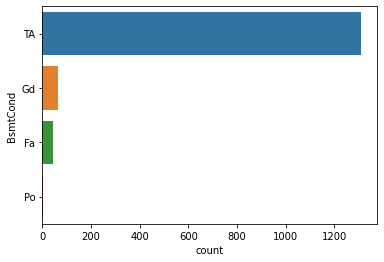

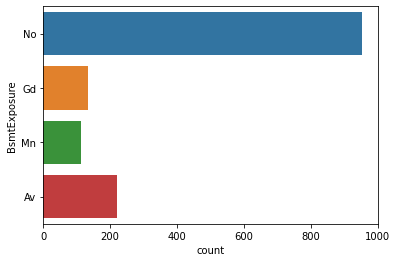

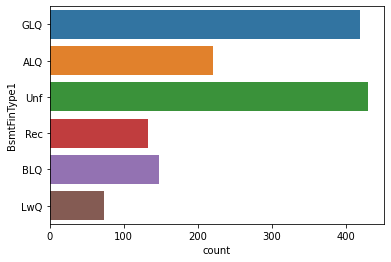

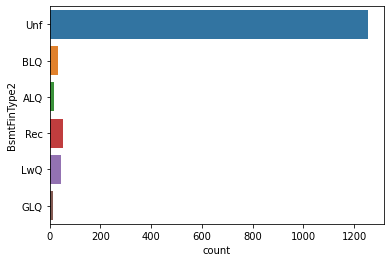

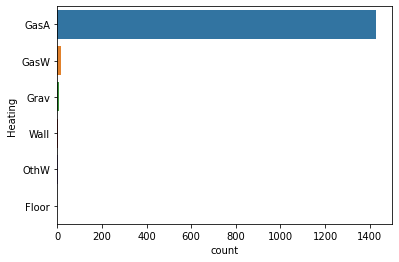

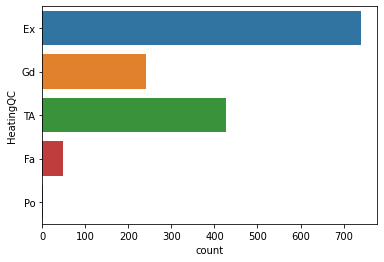

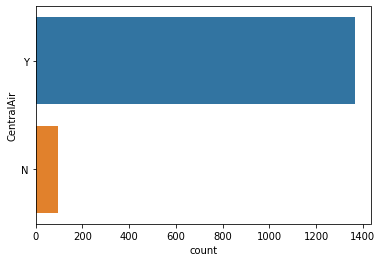

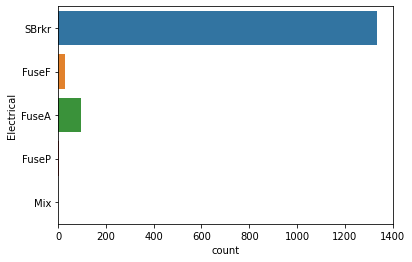

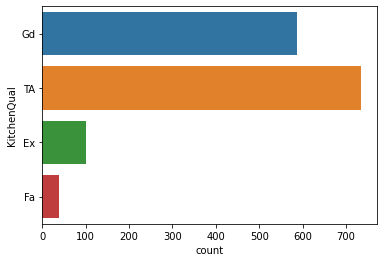

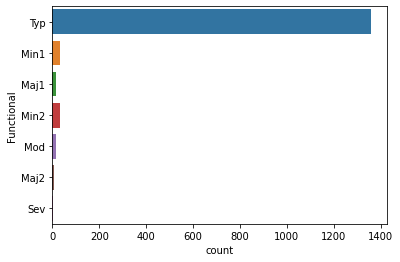

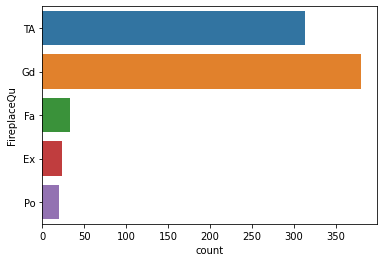

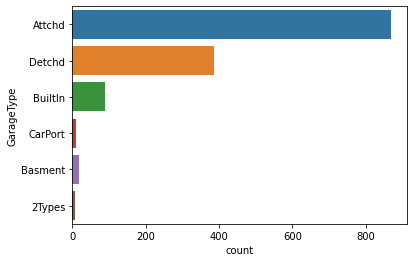

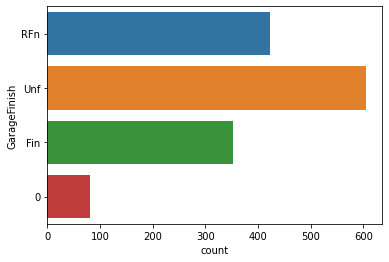

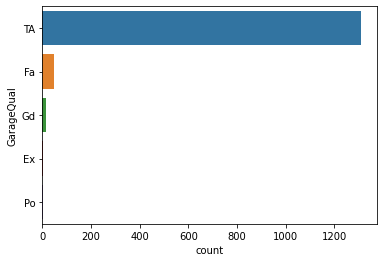

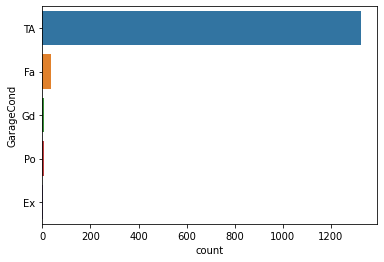

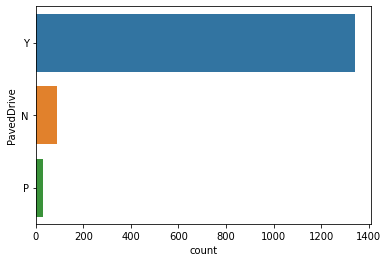

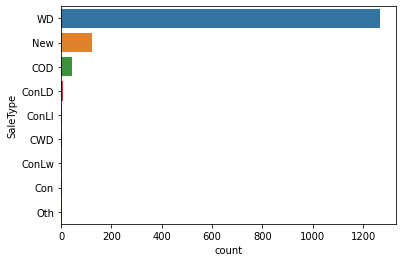

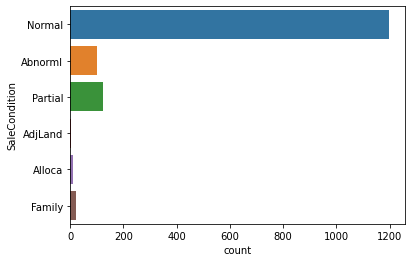

In [ ]:
for col in train.select_dtypes(include='object'):
    if train[col].nunique() <= 100:
        sns.countplot(y=col, data=train)
        plt.show()

Data Preprocessing

In [ ]:
for feature in categorical_features:
    temp=train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df=temp[temp>0.01].index
    train[feature]=np.where(train[feature].isin(temp_df),train[feature],'Rare_var')

In [ ]:
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,0.0,9765,Pave,IR2,Lvl,AllPub,Corner,...,0,0,0,0,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,Reg,HLS,AllPub,Inside,...,0,0,0,0,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,Reg,Lvl,AllPub,Corner,...,77,0,0,0,400,5,2010,COD,Abnorml,83000


In [ ]:
encode_1 = pd.get_dummies(train.MSZoning, prefix='MSZoning')
train = train.drop(['MSZoning'],axis = 1)
train = pd.concat([train, encode_1], axis=1)


In [ ]:
encode_2 = pd.get_dummies(train.Street, prefix='Street')
train = train.drop(['Street'],axis = 1)
train = pd.concat([train, encode_2], axis=1)


In [ ]:
encode_3 = pd.get_dummies(train.LotShape, prefix='LotShape')
train = train.drop(['LotShape'],axis = 1)
train = pd.concat([train, encode_3], axis=1)


In [ ]:
encode_4 = pd.get_dummies(train.LandContour, prefix='LandContour')
train = train.drop(['LandContour'],axis = 1)
train = pd.concat([train, encode_4], axis=1)


In [ ]:
encode_5 = pd.get_dummies(train.Utilities, prefix='Utilities')
train = train.drop(['Utilities'],axis = 1)
train = pd.concat([train, encode_5], axis=1)


In [ ]:
encode_6 = pd.get_dummies(train.LotConfig, prefix='LotConfig')
train = train.drop(['LotConfig'],axis = 1)
train = pd.concat([train, encode_6], axis=1)


In [ ]:
encode_7 = pd.get_dummies(train.LandSlope, prefix='LandSlope')
train = train.drop(['LandSlope'],axis = 1)
train = pd.concat([train, encode_7], axis=1)

In [ ]:
encode_8 = pd.get_dummies(train.Neighborhood, prefix='Neighborhood')
train = train.drop(['Neighborhood'],axis = 1)
train = pd.concat([train, encode_8], axis=1)

In [ ]:
encode_9 = pd.get_dummies(train.Condition1, prefix='Condition1')
train = train.drop(['Condition1'],axis = 1)
train = pd.concat([train, encode_9], axis=1)

In [ ]:
encode_10 = pd.get_dummies(train.Condition2, prefix='Condition2')
train = train.drop(['Condition2'],axis = 1)
train = pd.concat([train, encode_10], axis=1)

In [ ]:
encode_11 = pd.get_dummies(train.BldgType, prefix='BldgType')
train = train.drop(['BldgType'],axis = 1)
train = pd.concat([train, encode_11], axis=1)

In [ ]:
encode_12 = pd.get_dummies(train.HouseStyle, prefix='HouseStyle')
train = train.drop(['HouseStyle'],axis = 1)
train = pd.concat([train, encode_12], axis=1)

In [ ]:
encode_13 = pd.get_dummies(train.RoofStyle, prefix='RoofStyle')
train = train.drop(['RoofStyle'],axis = 1)
train = pd.concat([train, encode_13], axis=1)

In [ ]:
encode_14 = pd.get_dummies(train.RoofMatl, prefix='RoofMatl')
train = train.drop(['RoofMatl'],axis = 1)
train = pd.concat([train, encode_14], axis=1)

In [ ]:
encode_15 = pd.get_dummies(train.Exterior1st, prefix='Exterior1st')
train = train.drop(['Exterior1st'],axis = 1)
train = pd.concat([train, encode_15], axis=1)

In [ ]:
encode_16 = pd.get_dummies(train.Exterior2nd, prefix='Exterior2nd')
train = train.drop(['Exterior2nd'],axis = 1)
train = pd.concat([train, encode_16], axis=1)

In [ ]:
encode_17 = pd.get_dummies(train.MasVnrType, prefix='MasVnrType')
train = train.drop(['MasVnrType'],axis = 1)
train = pd.concat([train, encode_17], axis=1)

In [ ]:
encode_18 = pd.get_dummies(train.ExterQual, prefix='ExterQual')
train = train.drop(['ExterQual'],axis = 1)
train = pd.concat([train, encode_18], axis=1)

In [ ]:
encode_19 = pd.get_dummies(train.ExterCond, prefix='ExterCond')
train = train.drop(['ExterCond'],axis = 1)
train = pd.concat([train, encode_19], axis=1)

In [ ]:
encode_20 = pd.get_dummies(train.Foundation, prefix='Foundation')
train = train.drop(['Foundation'],axis = 1)
train = pd.concat([train, encode_20], axis=1)

In [ ]:
encode_21 = pd.get_dummies(train.BsmtQual, prefix='BsmtQual')
train = train.drop(['BsmtQual'],axis = 1)
train = pd.concat([train, encode_21], axis=1)

In [ ]:
encode_22 = pd.get_dummies(train.BsmtCond, prefix='BsmtCond')
train = train.drop(['BsmtCond'],axis = 1)
train = pd.concat([train, encode_22], axis=1)

In [ ]:
encode_23 = pd.get_dummies(train.BsmtExposure, prefix='BsmtExposure')
train = train.drop(['BsmtExposure'],axis = 1)
train = pd.concat([train, encode_23], axis=1)

In [ ]:
encode_24 = pd.get_dummies(train.BsmtFinType1, prefix='BsmtFinType1')
train = train.drop(['BsmtFinType1'],axis = 1)
train = pd.concat([train, encode_24], axis=1)

In [ ]:
encode_25 = pd.get_dummies(train.BsmtFinType2, prefix='BsmtFinType2')
train = train.drop(['BsmtFinType2'],axis = 1)
train = pd.concat([train, encode_25], axis=1)

In [ ]:
encode_26 = pd.get_dummies(train.Heating, prefix='Heating')
train = train.drop(['Heating'],axis = 1)
train = pd.concat([train, encode_26], axis=1)

In [ ]:
encode_27 = pd.get_dummies(train.HeatingQC, prefix='HeatingQC')
train = train.drop(['HeatingQC'],axis = 1)
train = pd.concat([train, encode_27], axis=1)

In [ ]:
encode_28 = pd.get_dummies(train.CentralAir, prefix='CentralAir')
train = train.drop(['CentralAir'],axis = 1)
train = pd.concat([train, encode_28], axis=1)

In [ ]:
encode_29 = pd.get_dummies(train.Electrical, prefix='Electrical')
train = train.drop(['Electrical'],axis = 1)
train = pd.concat([train, encode_29], axis=1)

In [ ]:
encode_30 = pd.get_dummies(train.KitchenQual, prefix='KitchenQual')
train = train.drop(['KitchenQual'],axis = 1)
train = pd.concat([train, encode_30], axis=1)

In [ ]:
encode_31 = pd.get_dummies(train.Functional, prefix='Functional')
train = train.drop(['Functional'],axis = 1)
train = pd.concat([train, encode_31], axis=1)

In [ ]:
encode_32 = pd.get_dummies(train.FireplaceQu, prefix='FireplaceQu')
train = train.drop(['FireplaceQu'],axis = 1)
train = pd.concat([train, encode_32], axis=1)

In [ ]:
encode_33 = pd.get_dummies(train.GarageType, prefix='GarageType')
train = train.drop(['GarageType'],axis = 1)
train = pd.concat([train, encode_33], axis=1)

In [ ]:
encode_34 = pd.get_dummies(train.GarageFinish, prefix='GarageFinish')
train = train.drop(['GarageFinish'],axis = 1)
train = pd.concat([train, encode_34], axis=1)

In [ ]:
encode_35 = pd.get_dummies(train.GarageQual, prefix='GarageQual')
train = train.drop(['GarageQual'],axis = 1)
train = pd.concat([train, encode_35], axis=1)

In [ ]:
encode_36 = pd.get_dummies(train.GarageCond, prefix='GarageCond')
train = train.drop(['GarageCond'],axis = 1)
train = pd.concat([train, encode_36], axis=1)

In [ ]:
encode_37 = pd.get_dummies(train.PavedDrive, prefix='PavedDrive')
train = train.drop(['PavedDrive'],axis = 1)
train = pd.concat([train, encode_37], axis=1)

In [ ]:
encode_38 = pd.get_dummies(train.SaleType, prefix='SaleType')
train = train.drop(['SaleType'],axis = 1)
train = pd.concat([train, encode_38], axis=1)

In [ ]:
encode_39 = pd.get_dummies(train.SaleCondition, prefix='SaleCondition')
train = train.drop(['SaleCondition'],axis = 1)
train = pd.concat([train, encode_39], axis=1)

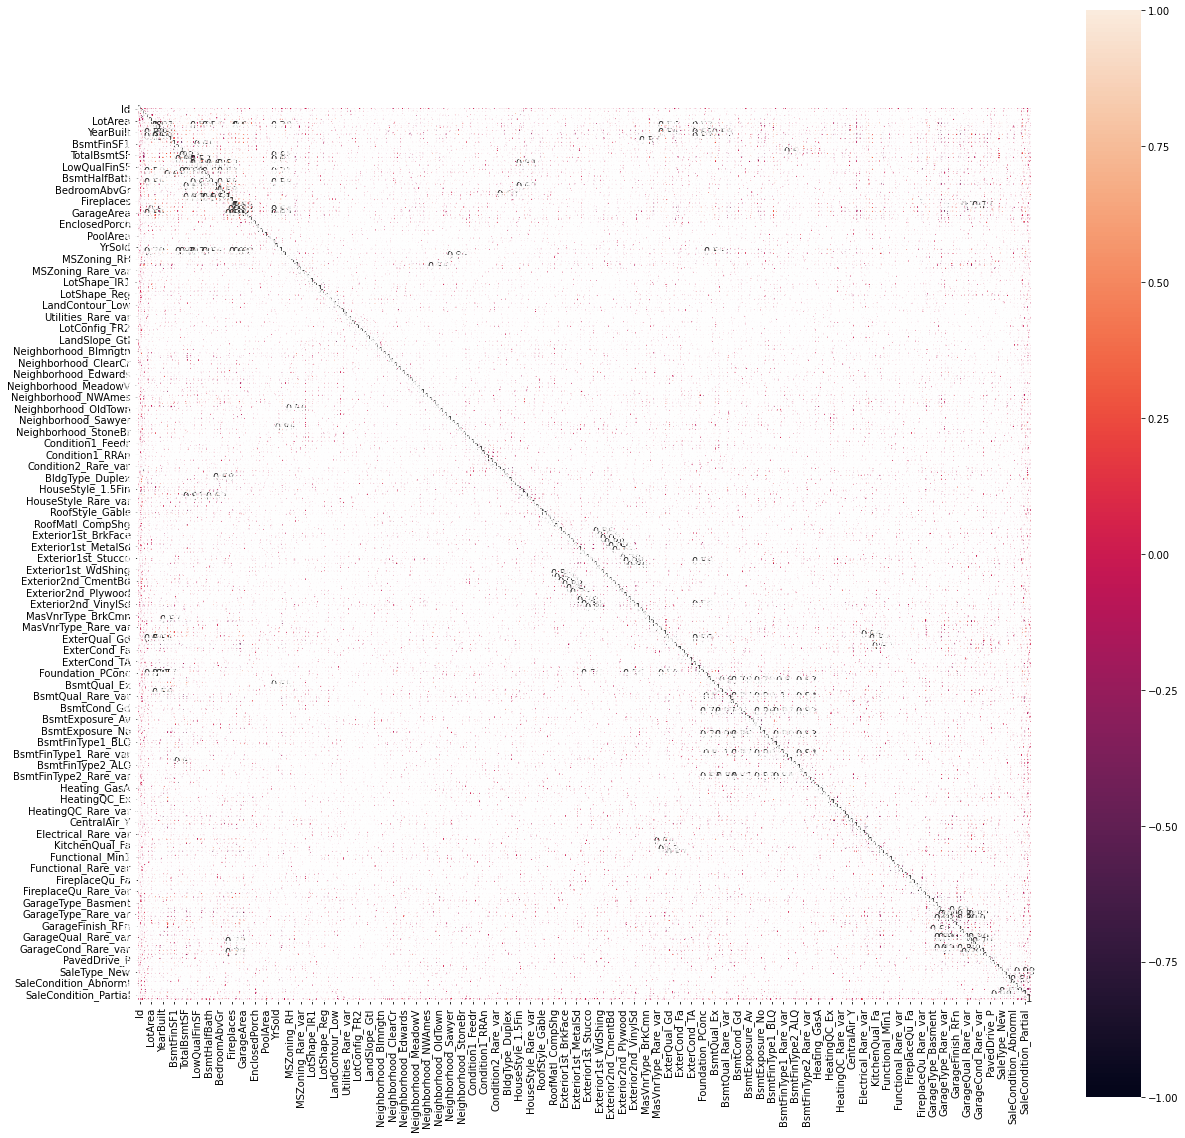

In [ ]:
data = train.copy()
corr_matrix = data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

In [ ]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.917808,0.029452,0.083562,0.019178,0.867808,0.069178,0.013699,0.820548,0.085616,0.010959
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.274751,0.169128,0.276824,0.137198,0.338815,0.253844,0.116277,0.383862,0.279893,0.104145
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Multi collinearity check
def get_redundant_pairs(train):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = train.columns
    for i in range(0, train.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [ ]:
# removing columns having less correlation with SalePrice feature
cols = []
correlation_data = corr_matrix.corr()
correlation_values = correlation_data['SalePrice'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.2:
        cols.append(correlation_values.index[col])
        train = train.drop([correlation_values.index[col]], axis=1)
train.shape

(1460, 173)

In [ ]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y , test_size = 0.25, random_state= 5)

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
models = [
           ['linearRegression:',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e+11, tolerance: 6.949e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.158e+11, tolerance: 6.949e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[12:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data


[{'Name': 'linearRegression:',
  'Test_R2_Score': 0.8603343389218601,
  'Test_RMSE_Score': 29396.656110951924,
  'Train_R2_Score': 0.8837022240511581,
  'Train_Time': 0.04078483581542969},
 {'Name': 'Lasso: ',
  'Test_R2_Score': 0.8606473791146505,
  'Test_RMSE_Score': 29363.69347348366,
  'Train_R2_Score': 0.8836119616277076,
  'Train_Time': 0.17065668106079102},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.8653670767285828,
  'Test_RMSE_Score': 28862.1546299795,
  'Train_R2_Score': 0.8831110093928418,
  'Train_Time': 0.009558916091918945},
 {'Name': 'ElasticNet: ',
  'Test_R2_Score': 0.8557402134896678,
  'Test_RMSE_Score': 29876.227225560626,
  'Train_R2_Score': 0.8123497258355173,
  'Train_Time': 0.2879140377044678},
 {'Name': 'DecisionTreeRegresson: ',
  'Test_R2_Score': 0.8016507206698293,
  'Test_RMSE_Score': 35032.28172195719,
  'Train_R2_Score': 0.9999959526919479,
  'Train_Time': 0.04913759231567383},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.6157872475130706,
  'T

In [ ]:
result_df = pd.DataFrame(model_data)

In [ ]:
result_df.head(11)

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.177063,0.883612,0.860647,29363.693473
1,Ridge:,0.031009,0.883111,0.865367,28862.154630
2,ElasticNet:,0.261152,0.812350,0.855740,29876.227226
3,DecisionTreeRegresson:,0.050208,0.999996,0.801651,35032.281722
4,KNeighborsRegressor:,0.005363,0.780493,0.615787,48757.227143
5,SVR:,0.210648,-0.064922,-0.075352,81569.608588
6,RandomForest,1.938896,0.976218,0.892477,25793.109162
7,ExtraTreeRegressor :,1.925522,0.999996,0.856538,29793.538032
8,GradientBoostingClassifier:,0.592124,0.968075,0.913892,23082.065003
9,XGBRegressor:,0.858083,0.964373,0.897038,25240.098496


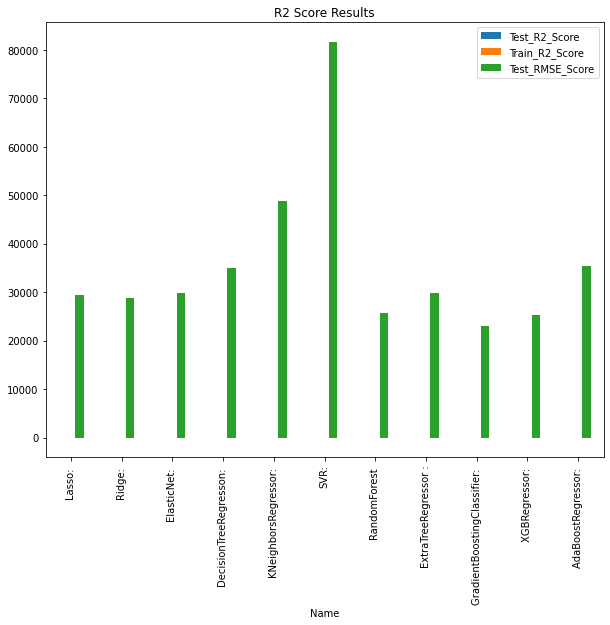

In [ ]:
#visualizing result
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], 
               kind="bar" , 
               title = 'R2 Score Results' , 
               figsize= (10,8)) ;

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import KFold
model=SVR(kernel='rbf')
kfold_validation=KFold(10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X, y,cv=kfold_validation)
print(results)
print(np.mean(results))

[-0.02693666 -0.11878301 -0.06299749 -0.05792069 -0.05287941 -0.06760945
 -0.02070436 -0.01583482 -0.08853441 -0.02567883]
-0.05378791284298119


In [ ]:
from sklearn.model_selection import ShuffleSplit
model=SVR(kernel='rbf')
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [ ]:
results

array([-0.05435085, -0.06461337, -0.02878345, -0.04402738, -0.04313584,
       -0.02269599, -0.05611245, -0.0233816 , -0.0678331 , -0.01484642])